<img src="http://witbanknews.sites.caxton.co.za/wp-content/uploads/sites/105/2015/01/warning.gif">

# Define Input Directories

In [35]:
%cd /home/ubuntu/courses-master/deeplearning1/nbs

/home/ubuntu/courses-master/deeplearning1/nbs


In [36]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/data/skin_lesion/data_sample'

In [37]:
print(current_dir)
print(DATA_HOME_DIR)

/home/ubuntu/courses-master/deeplearning1/nbs
/home/ubuntu/courses-master/deeplearning1/nbs/data/skin_lesion/data_sample


In [38]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path=DATA_HOME_DIR + '/results/'
train_path=DATA_HOME_DIR + '/train/'
valid_path=DATA_HOME_DIR + '/valid/'

train_path

/home/ubuntu/courses-master/deeplearning1/nbs/data/skin_lesion/data_sample


'/home/ubuntu/courses-master/deeplearning1/nbs/data/skin_lesion/data_sample/train/'

# Data - Train

Total Images - 876, Melanoma Images - 462, Benign Images - 414

# Validation Data

Total Images - 102, Melanoma Images - 51, Benign Images - 51

# VGG Pretrained Model

In [25]:
input_tensor = Input(shape=(3,224,224))
loaded_model = keras.applications.VGG16(weights='imagenet', 
                           include_top=True,
                           input_tensor=input_tensor)
loaded_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_18 (InputLayer)            (None, 3, 224, 224)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 224, 224)  1792        input_18[0][0]                   
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 224, 224)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 112, 112)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [26]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import model_from_json
from keras.layers import Dropout, Flatten, Dense, Input
from keras.models import Sequential
import keras as keras
from keras import backend as K
print keras.__version__
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import load_model

model_new_top = Sequential()
for layer in loaded_model.layers:
 	model_new_top.add(layer)	
    
latest_weights_filename = '/home/ubuntu/.keras/models/vgg16_weights_th_dim_ordering_th_kernels.h5'
model_new_top.load_weights(latest_weights_filename)

model_new_top.layers.pop()
for layer in loaded_model.layers:
    layer.trainable = False
    
model_new_top.add(Dense(2, activation='sigmoid'))
model_new_top.summary()

1.2.0
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_18 (InputLayer)            (None, 3, 224, 224)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 224, 224)  1792        input_18[0][0]                   
                                                                   input_18[0][0]                   
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 224, 224)  36928       block1_conv1[0][0]               
                                                                   block1_conv1[1][0]               
_____________________________________________________________________________________

In [39]:
gen=image.ImageDataGenerator(rescale=1./255)
train_batches = gen.flow_from_directory(train_path, target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=64)
val_batches = gen.flow_from_directory(valid_path, target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=64)

model_new_top.compile(optimizer='sgd',
                loss='binary_crossentropy', metrics=['accuracy'])

model_new_top.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample, nb_epoch=10,
                validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Found 876 images belonging to 2 classes.
Found 102 images belonging to 2 classes.
Epoch 1/10
876/876 [==============================] - 68s - loss: 0.6932 - acc: 0.4258 - val_loss: 0.6933 - val_acc: 0.4951
Epoch 2/10
876/876 [==============================] - 60s - loss: 0.6932 - acc: 0.5337 - val_loss: 0.6933 - val_acc: 0.4804
Epoch 3/10
876/876 [==============================] - 56s - loss: 0.6931 - acc: 0.5342 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 4/10
876/876 [==============================] - 56s - loss: 0.6930 - acc: 0.5342 - val_loss: 0.6934 - val_acc: 0.4804
Epoch 5/10
876/876 [==============================] - 52s - loss: 0.6929 - acc: 0.5342 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 6/10
876/876 [==============================] - 58s - loss: 0.6928 - acc: 0.5342 - val_loss: 0.6940 - val_acc: 0.4510
Epoch 7/10
876/876 [==============================] - 54s - loss: 0.6928 - acc: 0.5342 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 8/10
876/876 [==============================

# Train Top 3 dense layers

In [40]:
54.201.197.229from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import model_from_json
from keras.layers import Dropout, Flatten, Dense, Input
from keras.models import Sequential
import keras as keras
from keras import backend as K
print keras.__version__
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import load_model

input_tensor = Input(shape=(3,224,224))

# load model without top layer
loaded_model = keras.applications.VGG16(weights='imagenet', 
                           include_top=False,
                           input_tensor=input_tensor)

model_new = Sequential()
for layer in loaded_model.layers:
	layer.trainable = False
 	model_new.add(layer)	

latest_weights_filename = '/home/ubuntu/.keras/models/vgg16_weights_th_dim_ordering_th_kernels_notop.h5'
model_new.load_weights(latest_weights_filename)

model_new.add(Flatten(input_shape=model_new.output_shape[1:]))
model_new.add(Dense(4096, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(4096, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(2, activation='sigmoid'))

gen=image.ImageDataGenerator(rescale=1./255)
train_batches = gen.flow_from_directory(train_path, target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=64)
val_batches = gen.flow_from_directory(valid_path, target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=64)

model_new.compile(optimizer='sgd',
                loss='binary_crossentropy', metrics=['accuracy'])

model_new.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample, nb_epoch=10,
                validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

for layer in model_new.layers:
	layer.trainable = True 	

model_json = model_new.to_json()
with open(results_path + "model_dl4j3.json", "w") as json_file:
      json_file.write(model_json)

model_new.save_weights(results_path + 'saved_weights_dl4j3.h5')

1.2.0
Found 876 images belonging to 2 classes.
Found 102 images belonging to 2 classes.
Epoch 1/10
876/876 [==============================] - 65s - loss: 0.9339 - acc: 0.5091 - val_loss: 0.8647 - val_acc: 0.5784
Epoch 2/10
876/876 [==============================] - 54s - loss: 0.7050 - acc: 0.5748 - val_loss: 0.6706 - val_acc: 0.6127
Epoch 3/10
876/876 [==============================] - 55s - loss: 0.6730 - acc: 0.6130 - val_loss: 0.7011 - val_acc: 0.5882
Epoch 4/10
876/876 [==============================] - 59s - loss: 0.6418 - acc: 0.6318 - val_loss: 0.6122 - val_acc: 0.6324
Epoch 5/10
876/876 [==============================] - 55s - loss: 0.6243 - acc: 0.6284 - val_loss: 0.5759 - val_acc: 0.6520
Epoch 6/10
876/876 [==============================] - 54s - loss: 0.6307 - acc: 0.6381 - val_loss: 0.6025 - val_acc: 0.6765
Epoch 7/10
876/876 [==============================] - 57s - loss: 0.6259 - acc: 0.6524 - val_loss: 0.6191 - val_acc: 0.5980
Epoch 8/10
876/876 [========================

# Visualize

In [41]:
val_batches = gen.flow_from_directory(valid_path, target_size=(224,224),
                class_mode='categorical', shuffle=False, batch_size=64)

Found 102 images belonging to 2 classes.


In [42]:
val_batches.class_indices

{'benign': 0, 'malignant': 1}

In [43]:
probs = model_new.predict_generator(val_batches, val_batches.nb_sample)

In [44]:
expected_labels = val_batches.classes
expected_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [45]:
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [46]:
our_labels

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.], dtype=float32)

Found 71 correct labels
Benign: 0.322788, Melanoma: 0.677212387323


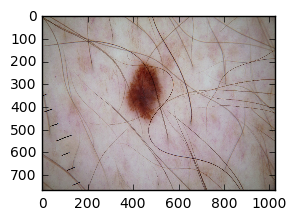

Benign: 0.422237, Melanoma: 0.577763110399


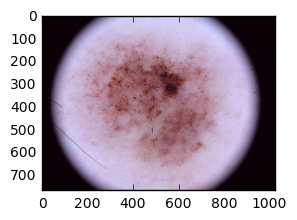

Benign: 0.290177, Melanoma: 0.70982298255


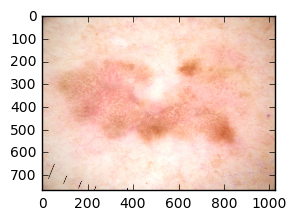

Benign: 0.751705, Melanoma: 0.248295426369


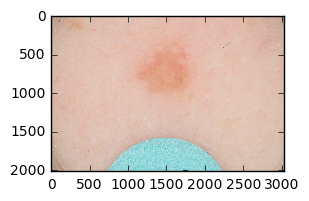

In [51]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg   
from numpy.random import random, permutation, randn, normal, uniform, choice
from keras.preprocessing import image

plt.ion()

correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:4]

for i in idx:
    print "Benign: " + str(probs[:,0][i]) + ", Melanoma: " + str(1 - probs[:,0][i])
    path = valid_path + val_batches.filenames[i]
    img=mpimg.imread(path)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()

Found 31 incorrect labels
Benign: 0.434086, Melanoma: 0.565913945436


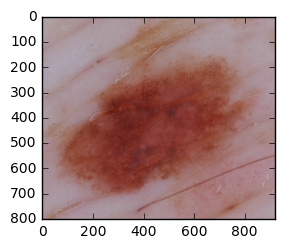

Benign: 0.325754, Melanoma: 0.674245625734


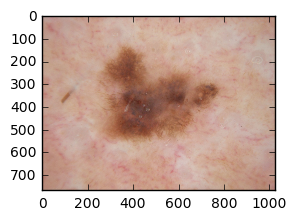

Benign: 0.345355, Melanoma: 0.654644876719


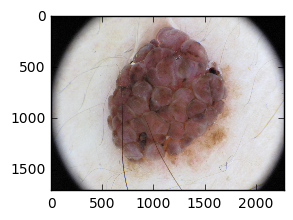

Benign: 0.311329, Melanoma: 0.688671052456


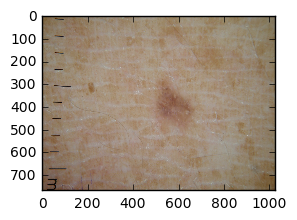

In [52]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg   
from numpy.random import random, permutation, randn, normal, uniform, choice
from keras.preprocessing import image

plt.ion()

correct = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(correct)
idx = permutation(correct)[:4]

for i in idx:
    print "Benign: " + str(probs[:,0][i]) + ", Melanoma: " + str(1 - probs[:,0][i])
    path = valid_path + val_batches.filenames[i]
    img=mpimg.imread(path)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()